# Machine Learning 2 Project NYX
### Group: Stats ML lead by David Stroud
### Yang Zhang
### 12/18/2020

## Problem Definition
1. Problem Statement
2. Ideal Problem Solution
3. Understanding insight into the problem
4. Technical requirements
## Research
1. Data Structure and source
2. Model architecture
3. Algorithm research
4. Hardware requirements
5. Software requirements
## Model Exploration
1. Establish baselines for model performance
2. Start with a simple model using initial data pipeline
3. Stay nimble and try many parallel (isolated) ideas 
## Model Refinement
1. Perform model-specific optimizations
2. Iteratively debug models as complexity is added


In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# For multiple line outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# read in the csv file
#movieData = pd.read_csv('C:/Users/taniat470s/Desktop/SMU_course/DS7335/Project_NYX/ml-25m/movies.csv') # read in the csv file
movieData = pd.read_csv('C:/Users/taniat470s/Desktop/SMU_course/DS7335/ml-latest-small/movies.csv') # read in the csv file
 
movieData.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# read in the csv file
#ratingData = pd.read_csv('C:/Users/taniat470s/Desktop/SMU_course/DS7335/Project_NYX/ml-25m/ratings.csv') # read in the csv file
ratingData = pd.read_csv('C:/Users/taniat470s/Desktop/SMU_course/DS7335/ml-latest-small/ratings.csv') # read in the csv file
      
ratingData.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
movieData.shape

(9742, 3)

In [5]:
ratingData.shape

(100836, 4)

In [6]:
ratingData.rating

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: rating, Length: 100836, dtype: float64

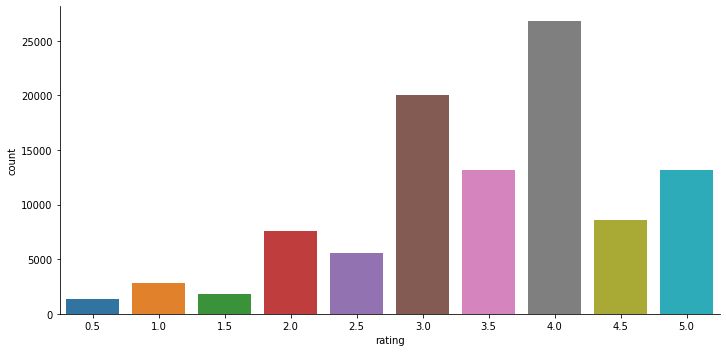

In [7]:
#Distribution of School Category
sns.factorplot("rating", data=ratingData, aspect=2,
                       kind="count")
plt.show()

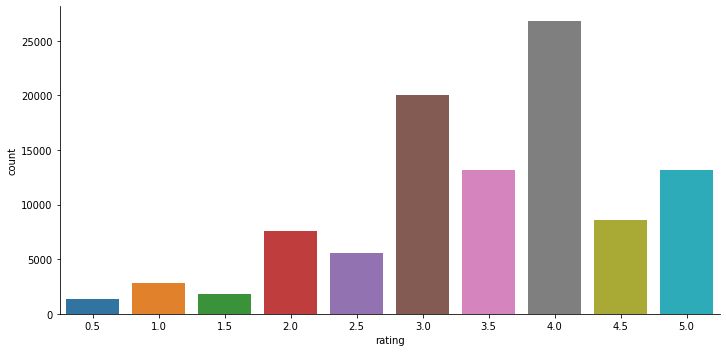

In [8]:
#Distribution of School Category
sns.factorplot("rating", data=ratingData, aspect=2,
                       kind="count")
plt.show()

In [9]:
# Data Frame of school type and counts
pd.DataFrame(ratingData["rating"].value_counts())

,rating
4.0,26818
3.0,20047
5.0,13211
3.5,13136
4.5,8551
2.0,7551
2.5,5550
1.0,2811
1.5,1791
0.5,1370


In [10]:
pd.DataFrame(movieData.genres.value_counts())

,genres
Drama,1053
Comedy,946
Comedy|Drama,435
Comedy|Romance,363
Drama|Romance,349
...,...
Action|Crime|Horror|Mystery|Thriller,1
Comedy|Drama|Fantasy|Mystery,1
Adventure|Comedy|Horror|Romance,1
Action|Adventure|Drama|Romance|Thriller|Western,1


In [11]:
ratingData.groupby('userId')[['rating']].median()

,rating
userId,
1,5.0
2,4.0
3,0.5
4,4.0
5,4.0
...,...
606,4.0
607,4.0
608,3.0


In [12]:
ratingData.groupby('movieId')[['rating']].median()

,rating
movieId,
1,4.0
2,3.5
3,3.0
4,3.0
5,3.0
...,...
193581,4.0
193583,3.5
193585,3.5


In [13]:
movie_rating_data = ratingData.groupby('movieId')[['rating']].mean()

In [14]:
movieData_copy = movieData
movieData_copy.index = movieData_copy.movieId
movieData_copy

,movieId,title,genres
movieId,,,
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,2,Jumanji (1995),Adventure|Children|Fantasy
3,3,Grumpier Old Men (1995),Comedy|Romance
4,4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
193581,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,193585,Flint (2017),Drama


In [15]:
movieData.shape
movie_rating_data.shape

(9742, 3)

(9724, 1)

In [16]:
movie_merge_data = pd.concat([movieData, movie_rating_data], axis=1, join='inner')
movie_merge_data.shape

(9724, 4)

In [17]:
# Display 20 movies with highest ratings
movie_merge_data.sort_values('rating', ascending=False).head(20)

,movieId,title,genres,rating
movieId,,,,
88448,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
100556,100556,"Act of Killing, The (2012)",Documentary,5.0
143031,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
143511,143511,Human (2015),Documentary,5.0
143559,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
6201,6201,Lady Jane (1986),Drama|Romance,5.0
102217,102217,Bill Hicks: Revelations (1993),Comedy,5.0
102084,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
6192,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0


## Kmeans Clustering

In [19]:
genres = ['Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']

In [20]:
# Function to get the genre ratings
def get_genre_ratings(ratings, movies, genres, column_names):
    genre_ratings = pd.DataFrame()
    for genre in genres:        
        genre_movies = movies[movies['genres'].str.contains(genre) ]
        avg_genre_votes_per_user = ratings[ratings['movieId'].isin(genre_movies['movieId'])].loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean().round(2)
        
        genre_ratings = pd.concat([genre_ratings, avg_genre_votes_per_user], axis=1)
        
    genre_ratings.columns = column_names
    return genre_ratings

### Clustering use ratings from romance movies and scifi movies.

In [22]:
# Calculate the average rating of romance and scifi movies
genre_ratings = get_genre_ratings(ratingData, movieData, ['Romance', 'Sci-Fi'], ['avg_romance_rating', 'avg_scifi_rating'])
genre_ratings.head()

,avg_romance_rating,avg_scifi_rating
1,4.31,4.22
2,4.50,3.88
3,0.50,4.20
4,3.38,2.83
5,3.09,2.50


In [23]:
# Function to get the biased dataset
def bias_genre_rating_dataset(genre_ratings, score_limit_1, score_limit_2):
    biased_dataset =    genre_ratings[((genre_ratings['avg_romance_rating'] < score_limit_1 - 0.2) & (genre_ratings['avg_scifi_rating'] > score_limit_2)) | ((genre_ratings['avg_scifi_rating'] < score_limit_1) & (genre_ratings['avg_romance_rating'] > score_limit_2))]
    biased_dataset = pd.concat([biased_dataset[:300], genre_ratings[:2]])
    biased_dataset = pd.DataFrame(biased_dataset.to_records())
    return biased_dataset

In [24]:
# Bias the dataset
biased_dataset = bias_genre_rating_dataset(genre_ratings, 3.2, 2.5)
# Printing the resulting number of records & the head of the dataset
print( "Number of records: ", len(biased_dataset))
biased_dataset.head()

Number of records:  162


,index,avg_romance_rating,avg_scifi_rating
0,3,0.50,4.20
1,4,3.38,2.83
2,5,3.09,2.50
3,7,2.65,3.15
4,9,3.17,3.00


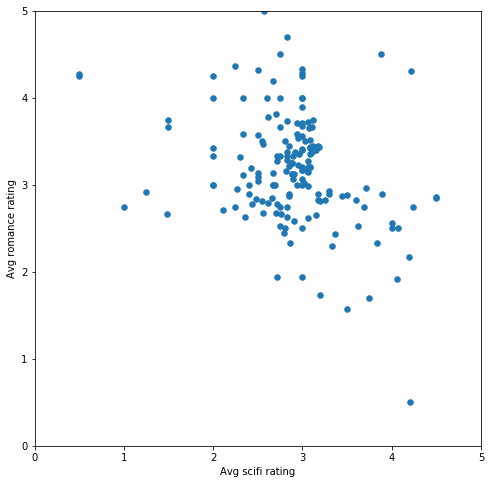

In [25]:
# Defining the scatterplot drawing function
def draw_scatterplot(x_data, x_label, y_data, y_label):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.scatter(x_data, y_data, s=30)
# Plot the scatterplot
draw_scatterplot(biased_dataset['avg_scifi_rating'],'Avg scifi rating', biased_dataset['avg_romance_rating'], 'Avg romance rating')

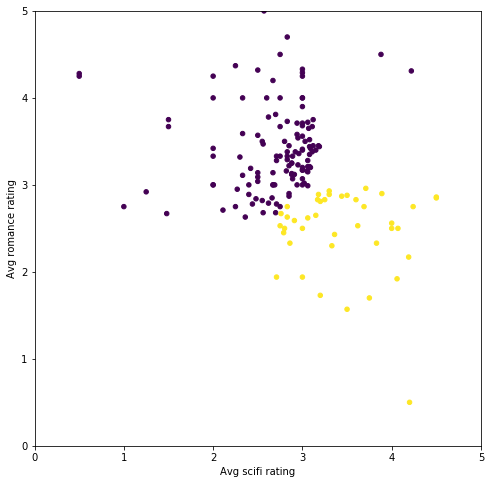

In [29]:
# Let's turn our dataset into a list
X = biased_dataset[['avg_scifi_rating','avg_romance_rating']].values
# Import KMeans
from sklearn.cluster import KMeans
# Create an instance of KMeans to find two clusters
kmeans_1 = KMeans(n_clusters=2)
# Use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(X)
# Defining the cluster plotting function
def draw_clusters(biased_dataset, predictions, cmap='viridis'):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel('Avg scifi rating')
    ax.set_ylabel('Avg romance rating')
    clustered = pd.concat([biased_dataset.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
    plt.scatter(clustered['avg_scifi_rating'], clustered['avg_romance_rating'], c=clustered['group'], s=20, cmap=cmap)
# Plot
draw_clusters(biased_dataset, predictions)

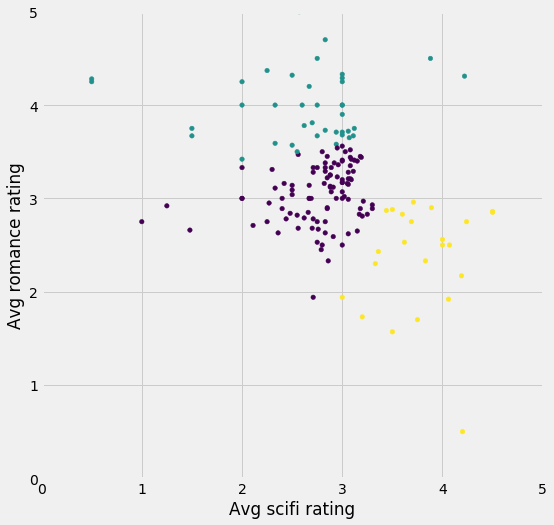

In [185]:
# Create an instance of KMeans to find three clusters
kmeans_2 = KMeans(n_clusters=3)
# Use fit_predict to cluster the dataset
predictions_2 = kmeans_2.fit_predict(X)
# Plot
draw_clusters(biased_dataset, predictions_2)

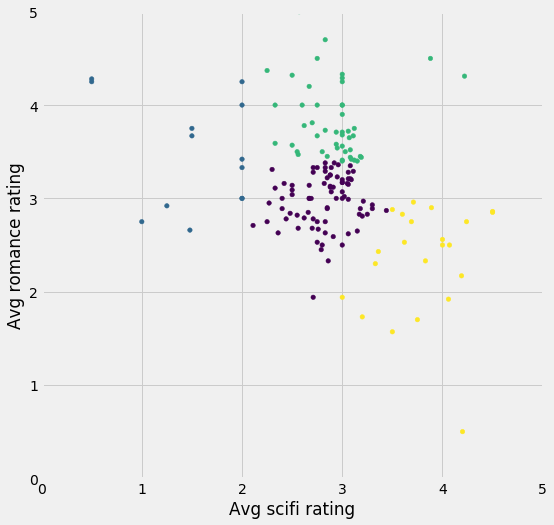

In [186]:
# Create an instance of KMeans to find three clusters
kmeans_3 = KMeans(n_clusters=4)
# Use fit_predict to cluster the dataset
predictions_3 = kmeans_3.fit_predict(X)
# Plot
draw_clusters(biased_dataset, predictions_3)

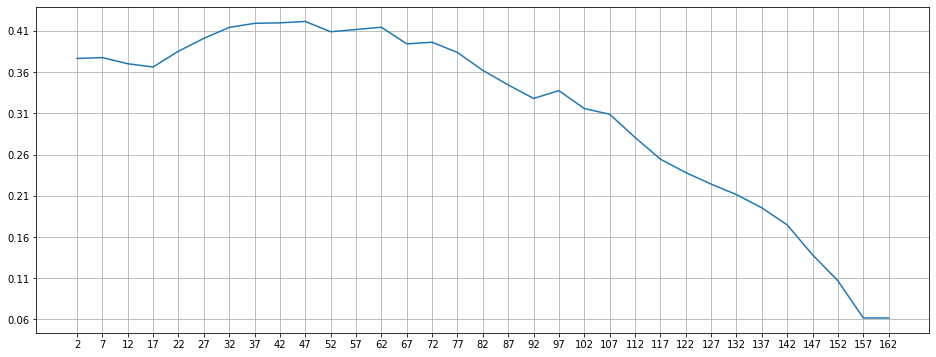

In [31]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Selecting our dataset to study
df = biased_dataset[['avg_scifi_rating','avg_romance_rating']]
# Choose the range of k values to test.
# We added a stride of 5 to improve performance. We don't need to calculate the error for every k value
possible_k_values = range(2, len(X)+1, 5)
# Define function to calculate the clustering errors
def clustering_errors(k, data):
    kmeans = KMeans(n_clusters=k).fit(data)
    predictions = kmeans.predict(data)
    #cluster_centers = kmeans.cluster_centers_
    # errors = [mean_squared_error(row, cluster_centers[cluster]) for row, cluster in zip(data.values, predictions)]
    # return sum(errors)
    silhouette_avg = silhouette_score(data, predictions)
    return silhouette_avg
# Calculate error values for all k values we're interested in
errors_per_k = [clustering_errors(k, X) for k in possible_k_values]
# Plot the each value of K vs. the silhouette score at that value
fig, ax = plt.subplots(figsize=(16, 6))
plt.plot(possible_k_values, errors_per_k)
# Ticks and grid
xticks = np.arange(min(possible_k_values), max(possible_k_values)+1, 5.0)
ax.set_xticks(xticks, minor=False)
ax.set_xticks(xticks, minor=True)
ax.xaxis.grid(True, which='both')
yticks = np.arange(round(min(errors_per_k), 2), max(errors_per_k), .05)
ax.set_yticks(yticks, minor=False)
ax.set_yticks(yticks, minor=True)
ax.yaxis.grid(True, which='both')

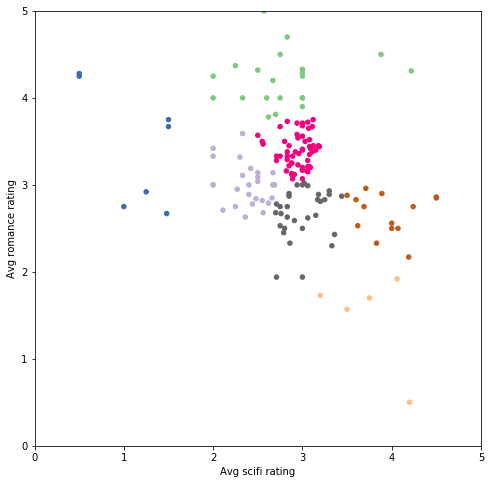

In [34]:
# Create an instance of KMeans to find seven clusters
kmeans_4 = KMeans(n_clusters=7)
# Use fit_predict to cluster the dataset
predictions_4 = kmeans_4.fit_predict(X)
# Plot
draw_clusters(biased_dataset, predictions_4, cmap='Accent')

#### Add Action Movie

In [35]:
# Select our biased dataset and add action genre
biased_dataset_3_genres = get_genre_ratings(ratingData, movieData, ['Romance','Sci-Fi', 'Action'],                                          
['avg_romance_rating', 'avg_scifi_rating', 'avg_action_rating'])
# Drop null values
biased_dataset_3_genres = bias_genre_rating_dataset(biased_dataset_3_genres, 3.2, 2.5).dropna()
# Print the number of records and the head of our dataset
print( "Number of records: ", len(biased_dataset_3_genres))
biased_dataset_3_genres.head()

Number of records:  161


,index,avg_romance_rating,avg_scifi_rating,avg_action_rating
0,3,0.50,4.20,3.57
1,4,3.38,2.83,3.32
2,5,3.09,2.50,3.11
3,7,2.65,3.15,3.26
4,9,3.17,3.00,3.12


In [36]:
# Turn dataset into a list
X_with_action = biased_dataset_3_genres[['avg_scifi_rating',                                                   'avg_romance_rating',                                                         'avg_action_rating']].values
# Create an instance of KMeans to find seven clusters
kmeans_5 = KMeans(n_clusters=7)
# Use fit_predict to cluster the dataset
predictions_5 = kmeans_5.fit_predict(X_with_action)

In [37]:
# Define 3d plotting function
def draw_clusters_3d(biased_dataset_3_genres, predictions):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel('Avg scifi rating')
    ax.set_ylabel('Avg romance rating')
    
    clustered = pd.concat([biased_dataset_3_genres.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
    colors = itertools.cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])
    
    for g in clustered.group.unique():
        color = next(colors)
        for index, point in clustered[clustered.group == g].iterrows():
            if point['avg_action_rating'].astype(float) > 3: 
                size = 50
            else:
                size = 15
            plt.scatter(point['avg_scifi_rating'], 
                        point['avg_romance_rating'], 
                        s=size, 
                        color=color)

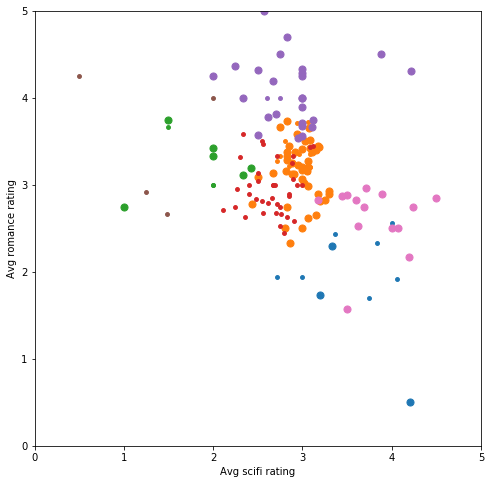

In [39]:
import itertools
# Plot
draw_clusters_3d(biased_dataset_3_genres, predictions_5)

In [68]:
# Select our biased dataset and add action genre
biased_dataset_3_genres = get_genre_ratings(ratingData, movieData, ['Romance','Sci-Fi', 'Animation'],                                          
['avg_romance_rating', 'avg_scifi_rating', 'avg_animation_rating'])
# Drop null values
biased_dataset_3_genres = bias_genre_rating_dataset(biased_dataset_3_genres, 3.2, 2.5).dropna()
# Print the number of records and the head of our dataset
print( "Number of records: ", len(biased_dataset_3_genres))
biased_dataset_3_genres.head()

Number of records:  141


,index,avg_romance_rating,avg_scifi_rating,avg_animation_rating
0,3,0.50,4.20,0.50
1,4,3.38,2.83,4.00
2,5,3.09,2.50,4.33
3,7,2.65,3.15,3.39
4,9,3.17,3.00,4.00


In [69]:
# Turn dataset into a list
X_with_animation = biased_dataset_3_genres[['avg_scifi_rating',                                                   'avg_romance_rating',                                                         'avg_animation_rating']].values
# Create an instance of KMeans to find seven clusters
kmeans_5 = KMeans(n_clusters=7)
# Use fit_predict to cluster the dataset
predictions_5 = kmeans_5.fit_predict(X_with_action)

In [75]:
# Define 3d plotting function
def draw_clusters_3d(biased_dataset_3_genres, predictions):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    ax.set_xlabel('Avg scifi rating')
    ax.set_ylabel('Avg animation rating')
    
    clustered = pd.concat([biased_dataset_3_genres.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
    colors = itertools.cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])
    
    for g in clustered.group.unique():
        color = next(colors)
        for index, point in clustered[clustered.group == g].iterrows():
            if point['avg_romance_rating'].astype(float) > 3: 
                size = 50
            else:
                size = 15
            plt.scatter(point['avg_scifi_rating'], 
                        point['avg_animation_rating'], 
                        s=size, 
                        color=color)

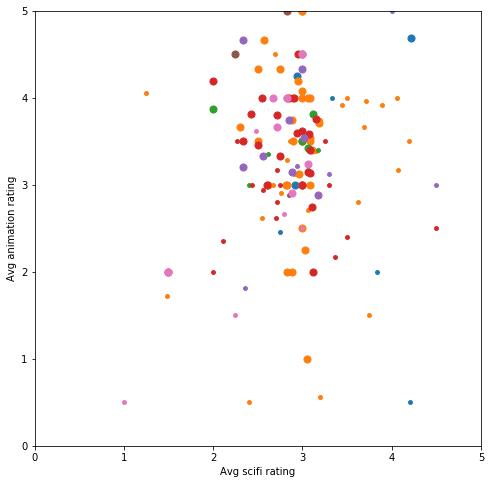

In [76]:
import itertools
# Plot
draw_clusters_3d(biased_dataset_3_genres, predictions_5)

In [42]:
# Merge the two tables then pivot so we have Users X Movies dataframe
movieData_copy.index.name = None
ratings_title = pd.merge(ratingData, movieData_copy[['movieId', 'title']], on='movieId' )
ratings_title

,userId,movieId,rating,timestamp,title
0,1,1,4.0,964982703,Toy Story (1995)
1,5,1,4.0,847434962,Toy Story (1995)
2,7,1,4.5,1106635946,Toy Story (1995)
3,15,1,2.5,1510577970,Toy Story (1995)
4,17,1,4.5,1305696483,Toy Story (1995)
...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997)
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971)
100833,610,160836,3.0,1493844794,Hazard (2005)
100834,610,163937,3.5,1493848789,Blair Witch (2016)


In [212]:
user_movie_ratings = pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')
user_movie_ratings

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),*batteries not included (1987),...All the Marbles (1981),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [213]:
# Print he number of dimensions and a subset of the dataset
print('dataset dimensions: ', user_movie_ratings.shape, '\n\nSubset example:')
user_movie_ratings.iloc[:6, :10]

dataset dimensions:  (610, 9704) 

Subset example:


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),*batteries not included (1987),...All the Marbles (1981)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# Define Function to get the most rated movies
def get_most_rated_movies(user_movie_ratings, max_number_of_movies):
    # 1- Count
    user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)
    # 2- sort
    user_movie_ratings_sorted = user_movie_ratings.sort_values(len(user_movie_ratings)-1, axis=1, ascending=False)
    user_movie_ratings_sorted = user_movie_ratings_sorted.drop(user_movie_ratings_sorted.tail(1).index)
    # 3- slice
    most_rated_movies = user_movie_ratings_sorted.iloc[:, :max_number_of_movies]
    return most_rated_movies
# Pivot the dataset and choose the first 1000 movies
user_movie_ratings =  pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')
most_rated_movies_1k = get_most_rated_movies(user_movie_ratings, 1000)

In [52]:
def get_users_who_rate_the_most(most_rated_movies, max_number_of_movies):
    # Get most voting users
    # 1- Count
    most_rated_movies['counts'] = pd.Series(most_rated_movies.count(axis=1))
    # 2- Sort
    most_rated_movies_users = most_rated_movies.sort_values('counts', ascending=False)
    # 3- Slice
    most_rated_movies_users_selection = most_rated_movies_users.iloc[:max_number_of_movies, :]
    most_rated_movies_users_selection = most_rated_movies_users_selection.drop(['counts'], axis=1)
    
    return most_rated_movies_users_selection

In [53]:
# Define the sorting by rating function
def sort_by_rating_density(user_movie_ratings, n_movies, n_users):
    most_rated_movies = get_most_rated_movies(user_movie_ratings, n_movies)
    most_rated_movies = get_users_who_rate_the_most(most_rated_movies, n_users)
    return most_rated_movies
# choose the number of movies and users and sort
n_movies = 30
n_users = 18
most_rated_movies_users_selection = sort_by_rating_density(user_movie_ratings, n_movies, n_users)


In [228]:
most_rated_movies_users_selection

title,Forrest Gump (1994),"Shawshank Redemption, The (1994)",Pulp Fiction (1994),"Silence of the Lambs, The (1991)","Matrix, The (1999)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),Braveheart (1995),Terminator 2: Judgment Day (1991),Schindler's List (1993),...,Star Wars: Episode VI - Return of the Jedi (1983),"Godfather, The (1972)","Fugitive, The (1993)",Batman (1989),Saving Private Ryan (1998),"Lord of the Rings: The Two Towers, The (2002)","Lord of the Rings: The Return of the King, The (2003)",Aladdin (1992),Fargo (1996),"Sixth Sense, The (1999)"
413,5.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0,...,5.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0,3.0
589,5.0,4.5,4.5,3.5,4.0,5.0,4.0,4.0,4.5,5.0,...,4.5,5.0,4.0,3.5,4.0,5.0,4.5,4.0,4.0,3.5
473,3.0,5.0,4.0,4.5,4.5,4.0,4.5,3.0,4.0,5.0,...,4.0,5.0,5.0,4.0,3.0,5.0,5.0,4.0,4.0,5.0
479,5.0,5.0,4.0,4.5,5.0,4.5,5.0,5.0,4.5,5.0,...,3.5,5.0,3.5,4.5,4.5,4.5,4.0,4.0,4.0,4.0
67,3.5,3.0,2.0,3.5,4.5,5.0,3.5,2.5,3.5,4.0,...,5.0,4.0,4.5,4.0,4.0,4.0,4.5,3.5,2.5,2.5
482,5.0,5.0,5.0,NaN,4.5,4.5,4.0,4.0,4.0,5.0,...,4.5,4.0,2.5,3.5,4.0,4.5,4.0,4.0,4.0,3.5
248,4.5,4.5,4.0,4.0,5.0,5.0,4.0,5.0,4.0,4.5,...,4.5,4.5,4.5,NaN,4.5,4.5,5.0,4.0,4.5,4.0
579,4.0,5.0,5.0,4.5,5.0,4.0,4.0,4.5,4.0,3.0,...,4.0,4.5,3.0,3.0,5.0,4.5,4.0,2.0,4.0,4.5
273,4.5,4.5,5.0,4.0,4.0,3.0,3.5,4.5,4.5,4.0,...,4.0,3.5,3.5,3.0,4.0,3.5,3.0,4.0,3.0,4.0
306,4.0,4.5,4.5,4.5,3.5,3.5,3.5,3.5,2.5,4.5,...,3.0,4.5,3.0,4.0,NaN,3.0,3.0,4.0,3.0,2.5


In [229]:
# Print the result
print('dataset dimensions: ', most_rated_movies_users_selection.shape)

dataset dimensions:  (18, 30)


In [230]:
most_rated_movies_users_selection.head()

title,Forrest Gump (1994),"Shawshank Redemption, The (1994)",Pulp Fiction (1994),"Silence of the Lambs, The (1991)","Matrix, The (1999)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),Braveheart (1995),Terminator 2: Judgment Day (1991),Schindler's List (1993),...,Star Wars: Episode VI - Return of the Jedi (1983),"Godfather, The (1972)","Fugitive, The (1993)",Batman (1989),Saving Private Ryan (1998),"Lord of the Rings: The Two Towers, The (2002)","Lord of the Rings: The Return of the King, The (2003)",Aladdin (1992),Fargo (1996),"Sixth Sense, The (1999)"
413,5.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0,...,5.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,5.0,3.0
589,5.0,4.5,4.5,3.5,4.0,5.0,4.0,4.0,4.5,5.0,...,4.5,5.0,4.0,3.5,4.0,5.0,4.5,4.0,4.0,3.5
473,3.0,5.0,4.0,4.5,4.5,4.0,4.5,3.0,4.0,5.0,...,4.0,5.0,5.0,4.0,3.0,5.0,5.0,4.0,4.0,5.0
479,5.0,5.0,4.0,4.5,5.0,4.5,5.0,5.0,4.5,5.0,...,3.5,5.0,3.5,4.5,4.5,4.5,4.0,4.0,4.0,4.0
67,3.5,3.0,2.0,3.5,4.5,5.0,3.5,2.5,3.5,4.0,...,5.0,4.0,4.5,4.0,4.0,4.0,4.5,3.5,2.5,2.5


In [56]:
def draw_movies_heatmap(most_rated_movies_users_selection, axis_labels=True):
    
    # Reverse to match the order of the printed dataframe
    #most_rated_movies_users_selection = most_rated_movies_users_selection.iloc[::-1]
    
    fig = plt.figure(figsize=(15,4))
    ax = plt.gca()
    
    # Draw heatmap
    heatmap = ax.imshow(most_rated_movies_users_selection,  interpolation='nearest', vmin=0, vmax=5, aspect='auto')

    if axis_labels:
        ax.set_yticks(np.arange(most_rated_movies_users_selection.shape[0]) , minor=False)
        ax.set_xticks(np.arange(most_rated_movies_users_selection.shape[1]) , minor=False)
        ax.invert_yaxis()
        ax.xaxis.tick_top()
        labels = most_rated_movies_users_selection.columns.str[:40]
        ax.set_xticklabels(labels, minor=False)
        ax.set_yticklabels(most_rated_movies_users_selection.index, minor=False)
        plt.setp(ax.get_xticklabels(), rotation=90)
    else:
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
    ax.grid(False)
    ax.set_ylabel('User id')

    # Separate heatmap from color bar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    # Color bar
    cbar = fig.colorbar(heatmap, ticks=[5, 4, 3, 2, 1, 0], cax=cax)
    cbar.ax.set_yticklabels(['5 stars', '4 stars','3 stars','2 stars','1 stars','0 stars'])



    plt.show()

NameError: name 'make_axes_locatable' is not defined

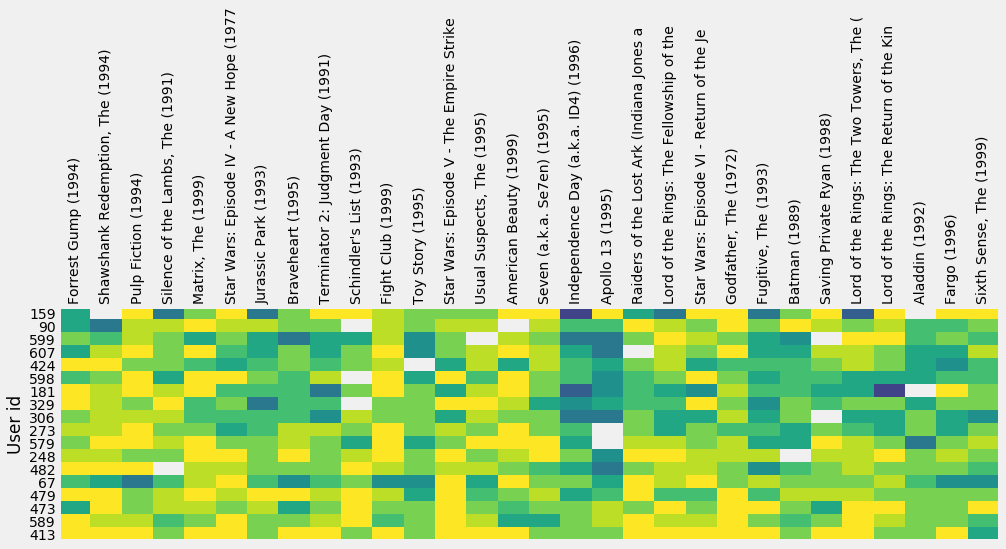

In [236]:
# Print the heatmap
draw_movies_heatmap(most_rated_movies_users_selection)

In [45]:
df_bows = pd.DataFrame.from_records(most_rated_movies_1k)

df_bows_fillna = df_bows.fillna(0)

# Keep NaN values and convert to Sparse type
sparse_bows = df_bows_fillna.astype('Sparse')
sparse_bows

title,Forrest Gump (1994),"Shawshank Redemption, The (1994)",Pulp Fiction (1994),"Silence of the Lambs, The (1991)","Matrix, The (1999)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),Braveheart (1995),Terminator 2: Judgment Day (1991),Schindler's List (1993),...,Scary Movie 2 (2001),About Schmidt (2002),21 Jump Street (2012),"Cider House Rules, The (1999)",Death Proof (2007),Moonraker (1979),"Virgin Suicides, The (1999)",¡Three Amigos! (1986),Waking Ned Devine (a.k.a. Waking Ned) (1998),Jacob's Ladder (1990)
0,4.0,0.0,3.0,4.0,5.0,5.0,4.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0
1,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,5.0,1.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
4,0.0,3.0,5.0,0.0,0.0,0.0,0.0,4.0,3.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,4.0,3.5,5.0,4.5,5.0,4.5,2.5,3.5,3.5,5.0,...,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,0.0
606,0.0,5.0,3.0,5.0,5.0,3.0,4.0,5.0,4.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
607,3.0,4.5,5.0,4.0,5.0,3.5,3.0,4.0,3.0,4.0,...,2.0,3.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0
608,4.0,4.0,4.0,0.0,0.0,0.0,3.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
from scipy.sparse import csr_matrix
# Conversion to sparse csr matrix
sparse_ratings = csr_matrix(sparse_bows).tocoo()

In [47]:
sparse_ratings

<610x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 61256 stored elements in COOrdinate format>

In [48]:
# 20 clusters
predictions = KMeans(n_clusters=20, algorithm='full').fit_predict(sparse_bows)

In [49]:
# Select the mas number of users and movies heatmap cluster
max_users = 70
max_movies = 50
# Cluster and print some of them
clustered = pd.concat([most_rated_movies_1k.reset_index(), pd.DataFrame({'group':predictions})], axis=1)

In [64]:
def draw_movie_clusters(clustered, max_users, max_movies):
    c=1
    for cluster_id in clustered.group.unique():
        # To improve visibility, we're showing at most max_users users and max_movies movies per cluster.
        # You can change these values to see more users & movies per cluster
        d = clustered[clustered.group == cluster_id].drop(['index', 'group'], axis=1)
        n_users_in_cluster = d.shape[0]
        
        d = sort_by_rating_density(d, max_movies, max_users)
        
        #d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
        #d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)
        d = d.reindex(d.mean().sort_values(ascending=False).index, axis=1)
        d = d.reindex(d.count(axis=1).sort_values(ascending=False).index)
        d = d.iloc[:max_users, :max_movies]
        n_users_in_plot = d.shape[0]
        
        # We're only selecting to show clusters that have more than 9 users, otherwise, they're less interesting
        if len(d) > 9:
            print('cluster # {}'.format(cluster_id))
            print('# of users in cluster: {}.'.format(n_users_in_cluster), '# of users in plot: {}'.format(n_users_in_plot))
            fig = plt.figure(figsize=(15,4))
            ax = plt.gca()

            ax.invert_yaxis()
            ax.xaxis.tick_top()
            labels = d.columns.str[:40]

            ax.set_yticks(np.arange(d.shape[0]) , minor=False)
            ax.set_xticks(np.arange(d.shape[1]) , minor=False)

            ax.set_xticklabels(labels, minor=False)
                        
            ax.get_yaxis().set_visible(False)

            # Heatmap
            heatmap = plt.imshow(d, vmin=0, vmax=5, aspect='auto')

            ax.set_xlabel('movies')
            ax.set_ylabel('User id')

            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad=0.05)

            # Color bar
            cbar = fig.colorbar(heatmap, ticks=[5, 4, 3, 2, 1, 0], cax=cax)
            cbar.ax.set_yticklabels(['5 stars', '4 stars','3 stars','2 stars','1 stars','0 stars'])

            plt.setp(ax.get_xticklabels(), rotation=90, fontsize=9)
            plt.tick_params(axis='both', which='both', bottom='off', top='off', left='off', labelbottom='off', labelleft='off') 
            #print('cluster # {} \n(Showing at most {} users and {} movies)'.format(cluster_id, max_users, max_movies))

            plt.show()


            # Let's only show 5 clusters
            # Remove the next three lines if you want to see all the clusters
            # Contribution welcomed: Pythonic way of achieving this
            c = c+1
            if c > 6:
                break

cluster # 16
# of users in cluster: 28. # of users in plot: 28


NameError: name 'make_axes_locatable' is not defined

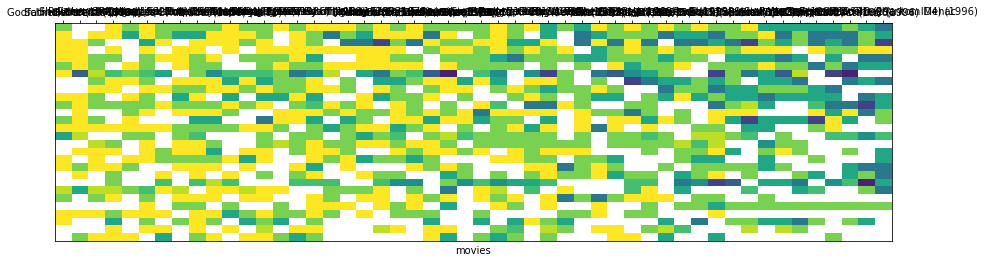

In [54]:
draw_movie_clusters(clustered, max_users, max_movies)

NameError: name 'make_axes_locatable' is not defined

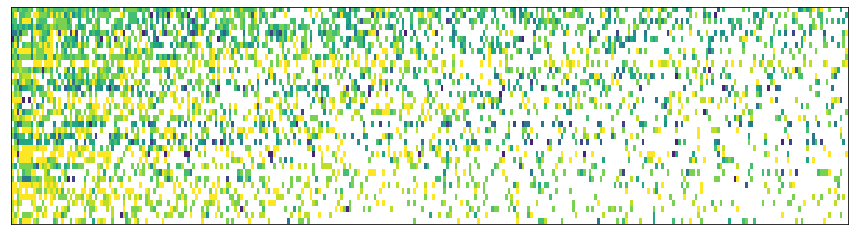

In [57]:
# Pick a cluster ID from the clusters above
cluster_number = 11
# Let's filter to only see the region of the dataset with the most number of values 
n_users = 75
n_movies = 300
cluster = clustered[clustered.group == cluster_number].drop(['index', 'group'], axis=1)
# Sort and print the cluster
cluster = sort_by_rating_density(cluster, n_movies, n_users)
draw_movies_heatmap(cluster, axis_labels=False)

NameError: name 'make_axes_locatable' is not defined

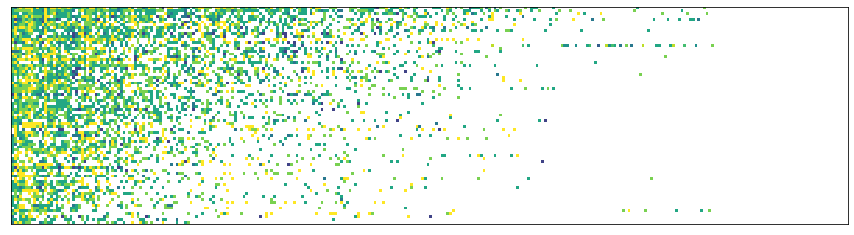

In [66]:
# Pick a cluster ID from the clusters above
cluster_number = 4
# Let's filter to only see the region of the dataset with the most number of values 
n_users = 75
n_movies = 300
cluster = clustered[clustered.group == cluster_number].drop(['index', 'group'], axis=1)
# Sort and print the cluster
cluster = sort_by_rating_density(cluster, n_movies, n_users)
draw_movies_heatmap(cluster, axis_labels=False)

In [58]:
# Print the ratings
cluster.fillna('').head()

,"Matrix, The (1999)","Dark Knight, The (2008)",Avatar (2009),Inception (2010),"Lord of the Rings: The Two Towers, The (2002)","Lord of the Rings: The Return of the King, The (2003)","Lord of the Rings: The Fellowship of the Ring, The (2001)",Iron Man (2008),"Shawshank Redemption, The (1994)",Star Wars: Episode IV - A New Hope (1977),...,Princess Mononoke (Mononoke-hime) (1997),Galaxy Quest (1999),Office Space (1999),Serenity (2005),"Notebook, The (2004)",Man on Fire (2004),Armageddon (1998),A.I. Artificial Intelligence (2001),"Bug's Life, A (1998)",Reservoir Dogs (1992)
34,4,4,3,4,3.5,3.5,4,3.5,,4,...,5,,,4,,,,3,,
2,3.5,5,,3.5,3.5,4,4,,5,5,...,3.5,,,,,,,,,3
28,3.5,3.5,,3.5,5,5,5,3,,4,...,3.5,,3.5,,3.5,,3,,3,
12,3,3.5,3,3.5,3,3.5,3,3,4.5,2.5,...,4,,,,,,,,,
17,2,2,3.5,1.5,4,4,,3,5,5,...,,1.5,,,,,,,3.5,5


In [67]:
# TODO: Fill in the name of the column/movie. e.g. 'Forrest Gump (1994)'
# Pick a movie from the table above since we're looking at a subset
movie_name = 'Forrest Gump (1994)'

cluster[movie_name].mean()

4.353448275862069

In [61]:
# The average rating of 20 movies as rated by the users in the cluster
cluster.mean().head(20)

Matrix, The (1999)                                                                4.161290
Dark Knight, The (2008)                                                           4.112903
Avatar (2009)                                                                     3.433333
Inception (2010)                                                                  3.933333
Lord of the Rings: The Two Towers, The (2002)                                     3.948276
Lord of the Rings: The Return of the King, The (2003)                             4.214286
Lord of the Rings: The Fellowship of the Ring, The (2001)                         4.035714
Iron Man (2008)                                                                   3.642857
Shawshank Redemption, The (1994)                                                  4.611111
Star Wars: Episode IV - A New Hope (1977)                                         4.018519
Up (2009)                                                                         4.076923

In [62]:
# Pick a user ID from the dataset
user_id = 1
# Get all this user's ratings
user_2_ratings  = cluster.loc[user_id, :]
# Which movies did they not rate? 
user_2_unrated_movies =  user_2_ratings[user_2_ratings.isnull()]
# What are the ratings of these movies the user did not rate?
avg_ratings = pd.concat([user_2_unrated_movies, cluster.mean()], axis=1, join='inner').loc[:,0]
# Let's sort by rating so the highest rated movies are presented first
avg_ratings.sort_values(ascending=False)[:20]

Howl's Moving Castle (Hauru no ugoku shiro) (2004)     4.625000
One Flew Over the Cuckoo's Nest (1975)                 4.625000
Intouchables (2011)                                    4.500000
Back to the Future Part II (1989)                      4.500000
Alien (1979)                                           4.458333
Reservoir Dogs (1992)                                  4.428571
Back to the Future (1985)                              4.411765
Moonrise Kingdom (2012)                                4.375000
Schindler's List (1993)                                4.363636
Monty Python and the Holy Grail (1975)                 4.333333
Ex Machina (2015)                                      4.333333
The Revenant (2015)                                    4.300000
Boondock Saints, The (2000)                            4.285714
Royal Tenenbaums, The (2001)                           4.277778
Snatch (2000)                                          4.272727
Inglourious Basterds (2009)             